# SVM

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("cell_samples.csv")

In [ ]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df['type'] = 'Benign'

In [ ]:
df.loc[df["Class"] == 4,'type'] = 'Malignant'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
 11  type         699 non-null    object
dtypes: int64(10), object(2)
memory usage: 65.7+ KB


In [ ]:
df.sample(100)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class,type
334,785615,8,6,7,3,3,10,3,4,2,4,Malignant
658,1334015,7,8,8,7,3,10,7,2,3,4,Malignant
106,1170419,10,10,10,8,2,10,4,1,1,4,Malignant
46,1105257,3,7,7,4,4,9,4,8,1,4,Malignant
237,1241679,9,8,8,5,6,2,4,10,4,4,Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...
221,1225799,10,6,4,3,10,10,9,10,1,4,Malignant
229,1230175,10,10,10,3,10,10,9,10,1,4,Malignant
574,378275,10,9,7,3,4,2,7,7,1,4,Malignant
440,608157,10,4,3,10,4,10,10,1,1,4,Malignant


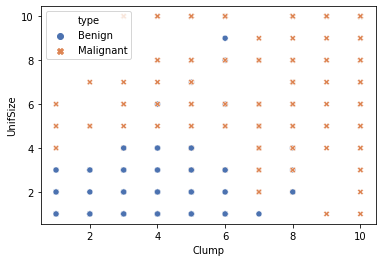

In [ ]:
sns.scatterplot(x = 'Clump', y = 'UnifSize',data = df,hue = 'type',style = 'type',palette='deep');

In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
type           object
dtype: object

In [ ]:
pd.to_numeric(df['BareNuc'],errors = 'coerce')

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
       ... 
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: BareNuc, Length: 699, dtype: float64

In [ ]:
df['BareNuc'].isnull().values.any()

False

In [ ]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:

len(df[df['BareNuc'] == 0])

0

In [ ]:
df.loc[df['BareNuc'] == '?','BareNuc'] = 0

In [ ]:
df['BareNuc'] = df['BareNuc'].astype(int)

In [ ]:
pd.Series.mean(df['BareNuc'])

3.463519313304721

In [ ]:
df.loc[df['BareNuc'] == 0,'BareNuc'] = 3

In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc         int64
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
type           object
dtype: object

In [ ]:
cols = list(df)
cols

['ID',
 'Clump',
 'UnifSize',
 'UnifShape',
 'MargAdh',
 'SingEpiSize',
 'BareNuc',
 'BlandChrom',
 'NormNucl',
 'Mit',
 'Class',
 'type']

In [ ]:
del cols[-2:]

In [ ]:
cols

['ID',
 'Clump',
 'UnifSize',
 'UnifShape',
 'MargAdh',
 'SingEpiSize',
 'BareNuc',
 'BlandChrom',
 'NormNucl',
 'Mit']

In [ ]:
X = np.asarray(df[cols])

In [ ]:
Y = np.asarray(df['Class'])

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 4)

In [46]:
from sklearn import svm
clf = svm.SVC(C = 10.0,kernel='rbf')
clf.fit(x_train, y_train) 


SVC(C=10.0)

In [47]:
yhat = clf.predict(x_test)
yhat [0:5]

array([4, 2, 2, 4, 2])

In [48]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9567619047619047